In [62]:
#import lab for the dataset
import numpy as np #array
import pandas as pd #data prepocessing for a structure
import seaborn as sns #ploting lab

from sklearn.model_selection import train_test_split # to split the x_train and y_train for prediction
from sklearn import svm #as its is a classification model we use svm
from sklearn.metrics import accuracy_score


In [63]:
#data collection and prepocessing
#load the dataset to dataframe
vj = pd.read_csv("/content/dataset.csv")
type(vj)


pandas.core.frame.DataFrame

In [64]:
#to know about the data 
#to know the columns
vj.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [65]:
#shape of the data
vj.shape

(614, 13)

In [66]:
#statistical information
vj.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [67]:
#number of missing values
vj.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [68]:
#we can't impute so we can't replace it hence it is catgorical value
vj = vj.dropna()



In [69]:
vj.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [70]:
#lable encoding
vj.replace({"Loan_Status":{"N":0,"Y":1}},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [71]:
vj.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


In [72]:
#dependent columns values
vj["Dependents"].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [73]:
 vj = vj.replace(to_replace="3+",value=4)

In [74]:
vj["Dependents"].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

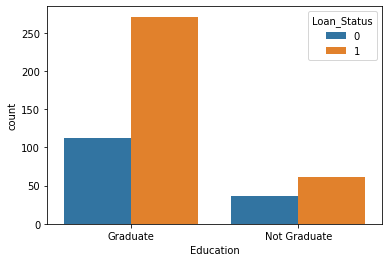

In [75]:
#data visualization
sns.countplot(x="Education",hue = "Loan_Status",data=vj)

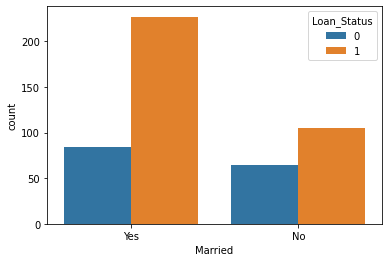

In [76]:
sns.countplot(x="Married",hue="Loan_Status",data=vj)

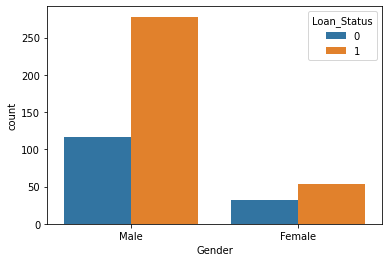

In [77]:
sns.countplot(x="Gender",hue="Loan_Status",data=vj)

In [78]:
#convert categorical columns to numbers values
vj.replace({"Married":{"No":0,"Yes":1},"Gender":{"Male":1,"Female":0},"Self_Employed":{"No":0,"Yes":1},"Property_Area":{"Rural":0,"Semiurban":1,"Urban":2},"Education":{"Graduate":1,"Not Graduate":0}},inplace=True)

In [79]:
vj.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,1,1,5417,4196.0,267.0,360.0,1.0,2,1


In [80]:
#separating the data and label
x=vj.drop(columns=["Loan_ID","Loan_Status"],axis=1)
y=vj["Loan_Status"]



In [81]:
print(x)
print(y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
5         1        1          2          1              1             5417   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

In [82]:
from re import X
#train and test split data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.1,stratify=y,random_state=2)

In [83]:
print(x.shape,X_train.shape,X_test.shape)

(480, 11) (432, 11) (48, 11)


In [84]:
#train the model
classifer = svm.SVC(kernel="linear")

In [85]:
classifer.fit(X_train,Y_train)

SVC(kernel='linear')

In [86]:
#model evaluation
#accuracy score
X_train_prediction = classifer.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [87]:
print("Accuracy on training model:",training_data_accuracy)

Accuracy on training model: 0.7986111111111112


In [88]:
X_test_prediction = classifer.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [89]:
print("Accuracy on testing model:",testing_data_accuracy)

Accuracy on testing model: 0.8333333333333334


In [90]:
import pickle
pickle.dump(classifer,open("svm.pkl","wb"))
model = pickle.load(open("svm.pkl","rb"))